# Polarsの基礎
下記を参考に色々動かしてみる。  
適宜pandasとの違いも見る。  
https://www.pola.rs/  
https://qiita.com/_jinta/items/28442d25bba067c13bb7

In [1]:
!pip install polars

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 3.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.2 -> 23.0
[notice] To update, run: pip install --upgrade pip


In [1]:
import polars as pl
import pandas as pd
import seaborn as sns
import numpy as np
import os
import pyarrow as pa
import pyarrow.parquet as pq
from pathlib import Path
from glob import glob

##  データサイエンス100本ノック（構造化データ加工編）でお試し

In [2]:
# データがあるディレクトリへのパス指定
paths = Path('../../../100knocks-preprocess/docker/work/data/').glob('*.csv')
csv_list = [os.path.split(file) for file in paths]

In [3]:
csv_list

[('../../../100knocks-preprocess/docker/work/data', 'store.csv'),
 ('../../../100knocks-preprocess/docker/work/data', 'receipt.csv'),
 ('../../../100knocks-preprocess/docker/work/data', 'category.csv'),
 ('../../../100knocks-preprocess/docker/work/data', 'product.csv'),
 ('../../../100knocks-preprocess/docker/work/data', 'customer.csv'),
 ('../../../100knocks-preprocess/docker/work/data', 'geocode.csv')]

In [4]:
dtypes = {
    'customer_id': str,
    'gender_cd': str,
    'postal_cd': str,
    'application_store_cd': str,
    'status_cd': str,
    'category_major_cd': str,
    'category_medium_cd': str,
    'category_small_cd': str,
    'product_cd': str,
    'store_cd': str,
    'prefecture_cd': str,
    'tel_no': str,
    'postal_cd': str,
    'street': str,
    'application_date': str,
    'birth_day': pl.Date
}

# 複数のdfを辞書型に格納。理由は変数名ごとにread_csvするのが嫌だから。
df_dict = {}
for path, file in csv_list:
    file_name = file[:-4]
    df_dict[file_name] = pl.read_csv(os.path.join(path, file), dtypes=dtypes)

In [109]:
# レシートデータの先頭10件を確認
df_dict['receipt'].head(10)

sales_ymd,sales_epoch,store_cd,receipt_no,receipt_sub_no,customer_id,product_cd,quantity,amount
i64,i64,str,i64,i64,str,str,i64,i64
20181103,1541203200,"""S14006""",112,1,"""CS006214000001...","""P070305012""",1,158
20181118,1542499200,"""S13008""",1132,2,"""CS008415000097...","""P070701017""",1,81
20170712,1499817600,"""S14028""",1102,1,"""CS028414000014...","""P060101005""",1,170
20190205,1549324800,"""S14042""",1132,1,"""ZZ000000000000...","""P050301001""",1,25
20180821,1534809600,"""S14025""",1102,2,"""CS025415000050...","""P060102007""",1,90
20190605,1559692800,"""S13003""",1112,1,"""CS003515000195...","""P050102002""",1,138
20181205,1543968000,"""S14024""",1102,2,"""CS024514000042...","""P080101005""",1,30
20190922,1569110400,"""S14040""",1102,1,"""CS040415000178...","""P070501004""",1,128
20170504,1493856000,"""S13020""",1112,2,"""ZZ000000000000...","""P071302010""",1,770


In [122]:
# indexはないが、pandasのように書くことも可能。iloc,locは存在しない。
df_dict['receipt'][0:5]

sales_ymd,sales_epoch,store_cd,receipt_no,receipt_sub_no,customer_id,product_cd,quantity,amount
i64,i64,str,i64,i64,str,str,i64,i64
20181103,1541203200,"""S14006""",112,1,"""CS006214000001...","""P070305012""",1,158
20181118,1542499200,"""S13008""",1132,2,"""CS008415000097...","""P070701017""",1,81
20170712,1499817600,"""S14028""",1102,1,"""CS028414000014...","""P060101005""",1,170
20190205,1549324800,"""S14042""",1132,1,"""ZZ000000000000...","""P050301001""",1,25
20180821,1534809600,"""S14025""",1102,2,"""CS025415000050...","""P060102007""",1,90


In [123]:
df_dict['receipt'].columns

['sales_ymd',
 'sales_epoch',
 'store_cd',
 'receipt_no',
 'receipt_sub_no',
 'customer_id',
 'product_cd',
 'quantity',
 'amount']

In [117]:
# 任意の列を選択して表示。.selectを使うのが推奨。
cols = ['sales_ymd','customer_id', 'product_cd', 'amount']
df_dict['receipt'].select(cols).head(10)

sales_ymd,customer_id,product_cd,amount
i64,str,str,i64
20181103,"""CS006214000001...","""P070305012""",158
20181118,"""CS008415000097...","""P070701017""",81
20170712,"""CS028414000014...","""P060101005""",170
20190205,"""ZZ000000000000...","""P050301001""",25
20180821,"""CS025415000050...","""P060102007""",90
20190605,"""CS003515000195...","""P050102002""",138
20181205,"""CS024514000042...","""P080101005""",30
20190922,"""CS040415000178...","""P070501004""",128
20170504,"""ZZ000000000000...","""P071302010""",770


In [127]:
# .filterはpandasの.queryみたいな感じ。pl.col(列名)で列を選択する。locの列指定みたいな感じ。
df_dict['receipt'].filter(pl.col('amount') > 200).head()

sales_ymd,sales_epoch,store_cd,receipt_no,receipt_sub_no,customer_id,product_cd,quantity,amount
i64,i64,str,i64,i64,str,str,i64,i64
20170504,1493856000,"""S13020""",1112,2,"""ZZ000000000000...","""P071302010""",1,770
20191010,1570665600,"""S14027""",1102,1,"""CS027514000015...","""P071101003""",1,680
20171010,1507593600,"""S14021""",1162,1,"""CS021515000126...","""P040402001""",1,228
20180506,1525564800,"""S13039""",1112,1,"""CS039414000052...","""P059001019""",1,428
20190326,1553558400,"""S13016""",112,1,"""CS016215000032...","""P091401190""",1,780


In [130]:
# 複数条件
df_dict['receipt'].filter( (pl.col('amount') > 200) & (pl.col('quantity') > 1) ).head()

sales_ymd,sales_epoch,store_cd,receipt_no,receipt_sub_no,customer_id,product_cd,quantity,amount
i64,i64,str,i64,i64,str,str,i64,i64
20170616,1497571200,"""S12030""",1182,2,"""CS030515000078...","""P040503001""",2,596
20191017,1571270400,"""S13004""",1182,2,"""CS004413000039...","""P071401002""",2,2200
20180607,1528329600,"""S14022""",1112,2,"""CS022512000070...","""P050603001""",2,336
20180607,1528329600,"""S14045""",1142,2,"""ZZ000000000000...","""P060303001""",2,296
20180508,1525737600,"""S13004""",112,1,"""CS004215000154...","""P060303001""",2,296


In [134]:
# 条件を変数に格納してフィルタリングも可能。
condition = (pl.col('amount') > 200) & (pl.col('quantity') > 1)
df_dict['receipt'].filter(condition).head()

sales_ymd,sales_epoch,store_cd,receipt_no,receipt_sub_no,customer_id,product_cd,quantity,amount
i64,i64,str,i64,i64,str,str,i64,i64
20170616,1497571200,"""S12030""",1182,2,"""CS030515000078...","""P040503001""",2,596
20191017,1571270400,"""S13004""",1182,2,"""CS004413000039...","""P071401002""",2,2200
20180607,1528329600,"""S14022""",1112,2,"""CS022512000070...","""P050603001""",2,336
20180607,1528329600,"""S14045""",1142,2,"""ZZ000000000000...","""P060303001""",2,296
20180508,1525737600,"""S13004""",112,1,"""CS004215000154...","""P060303001""",2,296


In [136]:
# 一部の列名を変更したうえで、複数列を選択
df_dict['receipt'].select([
    pl.col('sales_ymd').alias('sales_date'), 'customer_id', 'product_cd', 'amount'
]).head(10)

sales_date,customer_id,product_cd,amount
i64,str,str,i64
20181103,"""CS006214000001...","""P070305012""",158
20181118,"""CS008415000097...","""P070701017""",81
20170712,"""CS028414000014...","""P060101005""",170
20190205,"""ZZ000000000000...","""P050301001""",25
20180821,"""CS025415000050...","""P060102007""",90
20190605,"""CS003515000195...","""P050102002""",138
20181205,"""CS024514000042...","""P080101005""",30
20190922,"""CS040415000178...","""P070501004""",128
20170504,"""ZZ000000000000...","""P071302010""",770


In [140]:
#pandasのqueryに相当する捜査はselect,filterの組み合わせで行う。
df_dict['receipt'].select(cols).filter(pl.col('customer_id') == 'CS018205000001')

sales_ymd,customer_id,product_cd,amount
i64,str,str,i64
20180911,"""CS018205000001...","""P071401012""",2200
20180414,"""CS018205000001...","""P060104007""",600
20170614,"""CS018205000001...","""P050206001""",990
20170614,"""CS018205000001...","""P060702015""",108
20190216,"""CS018205000001...","""P071005024""",102
20180414,"""CS018205000001...","""P071101002""",278
20190226,"""CS018205000001...","""P070902035""",168
20190924,"""CS018205000001...","""P060805001""",495
20190226,"""CS018205000001...","""P071401020""",2200


In [148]:
# 顧客IDと売上金額でフィルタリング。複数条件のフィルタリングは下記のように書く。
df_dict['receipt'].select(cols).filter(
    (pl.col('customer_id') == 'CS018205000001') &
    (pl.col('amount') > 1000)
)

sales_ymd,customer_id,product_cd,amount
i64,str,str,i64
20180911,"""CS018205000001...","""P071401012""",2200
20190226,"""CS018205000001...","""P071401020""",2200
20180911,"""CS018205000001...","""P071401005""",1100


In [149]:
# もう少し複雑な場合のフィルタリング
cols = ['sales_ymd','customer_id', 'product_cd', 'quantity','amount']

df_dict['receipt'].select(cols).filter(
    (pl.col('customer_id') == 'CS018205000001') &
    ((pl.col('amount') >= 1000) | (pl.col('quantity') >= 5))
)

sales_ymd,customer_id,product_cd,quantity,amount
i64,str,str,i64,i64
20180911,"""CS018205000001...","""P071401012""",1,2200
20180414,"""CS018205000001...","""P060104007""",6,600
20170614,"""CS018205000001...","""P050206001""",5,990
20190226,"""CS018205000001...","""P071401020""",1,2200
20180911,"""CS018205000001...","""P071401005""",1,1100


In [156]:
# amountが1000以上2000以下の場合。
# .is_betweenで範囲指定する
df_dict['receipt'].select(cols).filter(
    (pl.col('customer_id') == 'CS018205000001') &
    ((pl.col('amount').is_between(1000, 2000)) | (pl.col('quantity') >= 5))
)

sales_ymd,customer_id,product_cd,quantity,amount
i64,str,str,i64,i64
20180414,"""CS018205000001...","""P060104007""",6,600
20170614,"""CS018205000001...","""P050206001""",5,990
20180911,"""CS018205000001...","""P071401005""",1,1100


下記のようなpandasのqueryのような書き方はできず、エラーになる。  
.is_betweenはあまり直感的ではないけど、慣れの問題かも。

In [150]:
# df_dict['receipt'].select(cols).filter(
#     (pl.col('customer_id') == 'CS018205000001') &
#     (1000 <= pl.col('amount') <= 2000)
# )

ValueError: Since Expr are lazy, the truthiness of an Expr is ambiguous. Hint: use '&' or '|' to logically combine Expr, not 'and'/'or', and use 'x.is_in([y,z])' instead of 'x in [y,z]' to check membership.

In [159]:
#店舗データ（df_store）から、店舗コード（store_cd）が"S14"で始まるものだけ全項目抽出し、5件表示
df_dict['store'].filter(pl.col('store_cd').str.starts_with('S14')).head(5)

store_cd,store_name,prefecture_cd,prefecture,address,address_kana,tel_no,longitude,latitude,floor_area
str,str,str,str,str,str,str,f64,f64,f64
"""S14010""","""菊名店""","""14""","""神奈川県""","""神奈川県横浜市港北区菊名一丁...","""カナガワケンヨコハマシコウホ...","""045-123-4032""",139.6326,35.50049,1732.0
"""S14033""","""阿久和店""","""14""","""神奈川県""","""神奈川県横浜市瀬谷区阿久和西...","""カナガワケンヨコハマシセヤク...","""045-123-4043""",139.4961,35.45918,1495.0
"""S14036""","""相模原中央店""","""14""","""神奈川県""","""神奈川県相模原市中央二丁目""","""カナガワケンサガミハラシチュ...","""042-123-4045""",139.3716,35.57327,1679.0
"""S14040""","""長津田店""","""14""","""神奈川県""","""神奈川県横浜市緑区長津田みな...","""カナガワケンヨコハマシミドリ...","""045-123-4046""",139.4994,35.52398,1548.0
"""S14050""","""阿久和西店""","""14""","""神奈川県""","""神奈川県横浜市瀬谷区阿久和西...","""カナガワケンヨコハマシセヤク...","""045-123-4053""",139.4961,35.45918,1830.0


In [160]:
#顧客データ（df_customer）から顧客ID（customer_id）の末尾が1のものだけ全項目抽出し、5件表示
df_dict['customer'].filter(pl.col('customer_id').str.ends_with('1')).head(5)

customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd
str,str,str,str,date,i64,str,str,str,str,str
"""CS037613000071...","""六角 雅彦""","""9""","""不明""",1952-04-01,66,"""136-0076""","""東京都江東区南砂******...","""S13037""","""20150414""","""0-00000000-0"""
"""CS028811000001...","""堀井 かおり""","""1""","""女性""",1933-03-27,86,"""245-0016""","""神奈川県横浜市泉区和泉町**...","""S14028""","""20160115""","""0-00000000-0"""
"""CS040412000191...","""川井 郁恵""","""1""","""女性""",1977-01-05,42,"""226-0021""","""神奈川県横浜市緑区北八朔町*...","""S14040""","""20151101""","""1-20091025-4"""
"""CS028314000011...","""小菅 あおい""","""1""","""女性""",1983-11-26,35,"""246-0038""","""神奈川県横浜市瀬谷区宮沢**...","""S14028""","""20151123""","""1-20080426-5"""
"""CS039212000051...","""藤島 恵梨香""","""1""","""女性""",1997-02-03,22,"""166-0001""","""東京都杉並区阿佐谷北****...","""S13039""","""20171121""","""1-20100215-4"""


In [162]:
#店舗データ（df_store）から、住所 (address) に"横浜市"が含まれるものだけ全項目表示
df_dict['store'].filter(pl.col('address').str.contains('横浜市'))

store_cd,store_name,prefecture_cd,prefecture,address,address_kana,tel_no,longitude,latitude,floor_area
str,str,str,str,str,str,str,f64,f64,f64
"""S14010""","""菊名店""","""14""","""神奈川県""","""神奈川県横浜市港北区菊名一丁...","""カナガワケンヨコハマシコウホ...","""045-123-4032""",139.6326,35.50049,1732.0
"""S14033""","""阿久和店""","""14""","""神奈川県""","""神奈川県横浜市瀬谷区阿久和西...","""カナガワケンヨコハマシセヤク...","""045-123-4043""",139.4961,35.45918,1495.0
"""S14040""","""長津田店""","""14""","""神奈川県""","""神奈川県横浜市緑区長津田みな...","""カナガワケンヨコハマシミドリ...","""045-123-4046""",139.4994,35.52398,1548.0
"""S14050""","""阿久和西店""","""14""","""神奈川県""","""神奈川県横浜市瀬谷区阿久和西...","""カナガワケンヨコハマシセヤク...","""045-123-4053""",139.4961,35.45918,1830.0
"""S14028""","""二ツ橋店""","""14""","""神奈川県""","""神奈川県横浜市瀬谷区二ツ橋町...","""カナガワケンヨコハマシセヤク...","""045-123-4042""",139.4963,35.46304,1574.0
"""S14012""","""本牧和田店""","""14""","""神奈川県""","""神奈川県横浜市中区本牧和田""","""カナガワケンヨコハマシナカク...","""045-123-4034""",139.6582,35.42156,1341.0
"""S14046""","""北山田店""","""14""","""神奈川県""","""神奈川県横浜市都筑区北山田一...","""カナガワケンヨコハマシツヅキ...","""045-123-4049""",139.5916,35.56189,831.0
"""S14011""","""日吉本町店""","""14""","""神奈川県""","""神奈川県横浜市港北区日吉本町...","""カナガワケンヨコハマシコウホ...","""045-123-4033""",139.6316,35.54655,890.0
"""S14048""","""中川中央店""","""14""","""神奈川県""","""神奈川県横浜市都筑区中川中央...","""カナガワケンヨコハマシツヅキ...","""045-123-4051""",139.5758,35.54912,1657.0


In [163]:
#顧客データ（df_customer）から、ステータスコード（status_cd）の先頭がアルファベットのA〜Fで始まるデータを全項目抽出し、5件表示
#containsには正規表現も使用可能
df_dict['customer'].filter(pl.col('status_cd').str.contains(r'^[A-F]')).head(5)

customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd
str,str,str,str,date,i64,str,str,str,str,str
"""CS031415000172...","""宇多田 貴美子""","""1""","""女性""",1976-10-04,42,"""151-0053""","""東京都渋谷区代々木*****...","""S13031""","""20150529""","""D-20100325-C"""
"""CS015414000103...","""奥野 陽子""","""1""","""女性""",1977-08-09,41,"""136-0073""","""東京都江東区北砂******...","""S13015""","""20150722""","""B-20100609-B"""
"""CS011215000048...","""芦田 沙耶""","""1""","""女性""",1992-02-01,27,"""223-0062""","""神奈川県横浜市港北区日吉本町...","""S14011""","""20150228""","""C-20100421-9"""
"""CS029415000023...","""梅田 里穂""","""1""","""女性""",1976-01-17,43,"""279-0043""","""千葉県浦安市富士見*****...","""S12029""","""20150610""","""D-20100918-E"""
"""CS035415000029...","""寺沢 真希""","""9""","""不明""",1977-09-27,41,"""158-0096""","""東京都世田谷区玉川台****...","""S13035""","""20141220""","""F-20101029-F"""


In [165]:
#顧客データ（df_customer）から、ステータスコード（status_cd）の末尾が数字の1〜9で終わるデータを全項目抽出し、5件表示せよ。
df_dict['customer'].filter(pl.col('status_cd').str.contains(r'[1-9]$')).head(5)

customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd
str,str,str,str,date,i64,str,str,str,str,str
"""CS001215000145...","""田崎 美紀""","""1""","""女性""",1995-03-29,24,"""144-0055""","""東京都大田区仲六郷*****...","""S13001""","""20170605""","""6-20090929-2"""
"""CS033513000180...","""安斎 遥""","""1""","""女性""",1962-07-11,56,"""241-0823""","""神奈川県横浜市旭区善部町**...","""S14033""","""20150728""","""6-20080506-5"""
"""CS011215000048...","""芦田 沙耶""","""1""","""女性""",1992-02-01,27,"""223-0062""","""神奈川県横浜市港北区日吉本町...","""S14011""","""20150228""","""C-20100421-9"""
"""CS040412000191...","""川井 郁恵""","""1""","""女性""",1977-01-05,42,"""226-0021""","""神奈川県横浜市緑区北八朔町*...","""S14040""","""20151101""","""1-20091025-4"""
"""CS009315000023...","""皆川 文世""","""1""","""女性""",1980-04-15,38,"""154-0012""","""東京都世田谷区駒沢*****...","""S13009""","""20150319""","""5-20080322-1"""


In [167]:
#顧客データ（df_customer）から、ステータスコード（status_cd）の先頭がアルファベットのA〜Fで始まり、末尾が数字の1〜9で終わるデータを全項目抽出し、5件表示せよ。
df_dict['customer'].filter(pl.col('status_cd').str.contains(r'^[A-F].*[1-9]$')).head(5)

customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd
str,str,str,str,date,i64,str,str,str,str,str
"""CS011215000048...","""芦田 沙耶""","""1""","""女性""",1992-02-01,27,"""223-0062""","""神奈川県横浜市港北区日吉本町...","""S14011""","""20150228""","""C-20100421-9"""
"""CS022513000105...","""島村 貴美子""","""1""","""女性""",1962-03-12,57,"""249-0002""","""神奈川県逗子市山の根****...","""S14022""","""20150320""","""A-20091115-7"""
"""CS001515000096...","""水野 陽子""","""9""","""不明""",1960-11-29,58,"""144-0053""","""東京都大田区蒲田本町****...","""S13001""","""20150614""","""A-20100724-7"""
"""CS013615000053...","""西脇 季衣""","""1""","""女性""",1953-10-18,65,"""261-0026""","""千葉県千葉市美浜区幕張西**...","""S12013""","""20150128""","""B-20100329-6"""
"""CS020412000161...","""小宮 薫""","""1""","""女性""",1974-05-21,44,"""174-0042""","""東京都板橋区東坂下*****...","""S13020""","""20150822""","""B-20081021-3"""


In [168]:
#店舗データ（df_store）から、電話番号（tel_no）が3桁-3桁-4桁のデータを全項目表示せよ。
df_dict['store'].filter(pl.col('tel_no').str.contains(r'^[0-9]{3}-[0-9]{3}-[0-9]{4}$')).head(5)

store_cd,store_name,prefecture_cd,prefecture,address,address_kana,tel_no,longitude,latitude,floor_area
str,str,str,str,str,str,str,f64,f64,f64
"""S12014""","""千草台店""","""12""","""千葉県""","""千葉県千葉市稲毛区千草台一丁...","""チバケンチバシイナゲクチグサ...","""043-123-4003""",140.118,35.63559,1698.0
"""S13002""","""国分寺店""","""13""","""東京都""","""東京都国分寺市本多二丁目""","""トウキョウトコクブンジシホン...","""042-123-4008""",139.4802,35.70566,1735.0
"""S14010""","""菊名店""","""14""","""神奈川県""","""神奈川県横浜市港北区菊名一丁...","""カナガワケンヨコハマシコウホ...","""045-123-4032""",139.6326,35.50049,1732.0
"""S14033""","""阿久和店""","""14""","""神奈川県""","""神奈川県横浜市瀬谷区阿久和西...","""カナガワケンヨコハマシセヤク...","""045-123-4043""",139.4961,35.45918,1495.0
"""S14036""","""相模原中央店""","""14""","""神奈川県""","""神奈川県相模原市中央二丁目""","""カナガワケンサガミハラシチュ...","""042-123-4045""",139.3716,35.57327,1679.0


In [171]:
#顧客データ（df_customer）を生年月日（birth_day）で高齢順にソートし、先頭から全項目を5件表示せよ。
df_dict['customer'].sort('birth_day').head(5)

customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd
str,str,str,str,date,i64,str,str,str,str,str
"""CS003813000014...","""村山 菜々美""","""1""","""女性""",1928-11-26,90,"""182-0007""","""東京都調布市菊野台*****...","""S13003""","""20160214""","""0-00000000-0"""
"""CS026813000004...","""吉村 朝陽""","""1""","""女性""",1928-12-14,90,"""251-0043""","""神奈川県藤沢市辻堂元町***...","""S14026""","""20150723""","""0-00000000-0"""
"""CS018811000003...","""熊沢 美里""","""1""","""女性""",1929-01-07,90,"""204-0004""","""東京都清瀬市野塩******...","""S13018""","""20150403""","""0-00000000-0"""
"""CS027803000004...","""内村 拓郎""","""0""","""男性""",1929-01-12,90,"""251-0031""","""神奈川県藤沢市鵠沼藤が谷**...","""S14027""","""20151227""","""0-00000000-0"""
"""CS013801000003...","""天野 拓郎""","""0""","""男性""",1929-01-15,90,"""274-0824""","""千葉県船橋市前原東*****...","""S12013""","""20160120""","""0-00000000-0"""


In [174]:
#顧客データ（df_customer）を生年月日（birth_day）で若い順にソートし、先頭から全項目を10件表示せよ。
# reverse=Trueにすることで降順にならべる
df_dict['customer'].sort('birth_day', reverse=True).head(5)

customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd
str,str,str,str,date,i64,str,str,str,str,str
"""CS035114000004...","""大村 美里""","""1""","""女性""",2007-11-25,11,"""156-0053""","""東京都世田谷区桜******...","""S13035""","""20150619""","""6-20091205-6"""
"""CS022103000002...","""福山 はじめ""","""9""","""不明""",2007-10-02,11,"""249-0006""","""神奈川県逗子市逗子*****...","""S14022""","""20160909""","""0-00000000-0"""
"""CS002113000009...","""柴田 真悠子""","""1""","""女性""",2007-09-17,11,"""184-0014""","""東京都小金井市貫井南町***...","""S13002""","""20160304""","""0-00000000-0"""
"""CS004115000014...","""松井 京子""","""1""","""女性""",2007-08-09,11,"""165-0031""","""東京都中野区上鷺宮*****...","""S13004""","""20161120""","""1-20081231-1"""
"""CS002114000010...","""山内 遥""","""1""","""女性""",2007-06-03,11,"""184-0015""","""東京都小金井市貫井北町***...","""S13002""","""20160920""","""6-20100510-1"""


In [176]:
#レシート明細データ（df_receipt）に対し、1件あたりの売上金額（amount）が高い順にランクを付与し、先頭から10件表示せよ。
#項目は顧客ID（customer_id）、売上金額（amount）、付与したランクを表示させること。なお、売上金額（amount）が等しい場合は同一順位を付与するものとする。
df_dict['receipt'].select([
    pl.col('customer_id'),
    pl.col('amount'),
    pl.col('amount').rank(method='min', reverse=True).alias('ranking')
]).sort('ranking').head(10)


customer_id,amount,ranking
str,i64,u32
"""CS011415000006...",10925,1
"""ZZ000000000000...",6800,2
"""CS028605000002...",5780,3
"""CS015515000034...",5480,4
"""ZZ000000000000...",5480,4
"""ZZ000000000000...",5480,4
"""ZZ000000000000...",5440,7
"""CS021515000089...",5440,7
"""CS015515000083...",5280,9


※rankメソッドについて  
デフォルトでは'amount'の昇順（小さいものから順に）にランク付けされるため、  
reverse=Trueにして降順にランク付けしている。ランク順に表示されるわけではないので最後にsortする必要あり。  
引数methodは同一値（重複値）の処理を指定するもので、  
method='min'とすると最小値が順位となる。1位、2位タイ、2位タイ、4位のようにしたいときに使う。  
参考：https://note.nkmk.me/python-pandas-rank/

In [178]:
# Datarfame長をカウント。pandasと同じ
len(df_dict['receipt'])

104681

## 特定の条件に当てはまる行だけ落とす(Polars vs Pandas)

In [125]:
# seabornからのデータセットはpandasのDataFrameの形
df_pd = sns.load_dataset('mpg') 
df_pd.dropna(inplace=True)

In [126]:
df_pd.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [129]:
# pandasからpolars DFへの変換
# 下記をimportしておかないとエラーになるかも
# import pyarrow as pa
# import pyarrow.parquet as pq
df_pl = pl.from_pandas(df_pd)

In [131]:
df_pl.head()

mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
f64,i64,f64,f64,i64,f64,i64,str,str
18.0,8,307.0,130.0,3504,12.0,70,"""usa""","""chevrolet chev..."
15.0,8,350.0,165.0,3693,11.5,70,"""usa""","""buick skylark ..."
18.0,8,318.0,150.0,3436,11.0,70,"""usa""","""plymouth satel..."
16.0,8,304.0,150.0,3433,12.0,70,"""usa""","""amc rebel sst"""
17.0,8,302.0,140.0,3449,10.5,70,"""usa""","""ford torino"""


<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

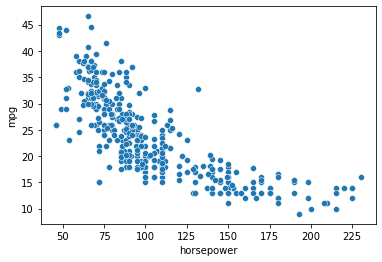

In [133]:
# polarsでは.valuesはないため、機械学習で使う場合はto_numpy()でnumpy配列に変換してreshapeする。
# Xはこの後特に使わない。
X = df_pl['horsepower'].to_numpy().reshape(-1, 1)
y = df_pl['mpg']
sns.scatterplot(x=df_pl['horsepower'], y=y)

# pandasの場合
# X = df_pa['horsepower'].values.reshape(-1, 1)
# y = df_pa['mpg']
# sns.scatterplot(x=df_pa['horsepower'], y=y)

このようなデータがあったときに一部のデータ(例えば、50 < horsepower < 75 かつ 30 < mpg < 45)だけ抜き出す、  
あるいは削除したいときは下記のようにすればよい。

In [134]:
len(df_pl)

392

In [139]:
# 不要な部分を抜き出す。is_betweenはデフォルトで指定区間の境界を含むので、除く場合はclosed='none'にすること
df_pl2 = df_pl.filter(
    ~((pl.col('horsepower').is_between(50.0, 75.0, closed='none')) &
    (pl.col('mpg').is_between(30.0, 45.0, closed='none')))
)

pandas同様にチルダでbooleanの否定ができる。  
polarsではindexはないので、特定部分だけ消したDFを定義したいのであれば、特定部分を表す条件式を書いて、  
その否定をとることで、特定部分を除いたDFを取得できる。  

In [140]:
len(df_pl2)

338

※Pandasの場合↓  
queryとindexの方が書き方的にはわかりやすいかも。  
polarsは早さのメリットがあるからしょうがないか。

In [141]:
# クエリで抽出と元データからの削除
drop_target = df_pd.query('50 < horsepower < 75 & 30 < mpg < 45').index
df_pd = df_pd.drop(index=drop_target).copy()

In [142]:
len(df_pd)

338

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

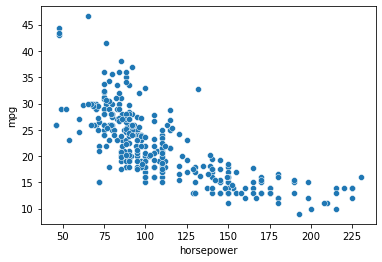

In [143]:
# polarsの場合
y = df_pl2['mpg']
sns.scatterplot(x=df_pl2['horsepower'], y=y)

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

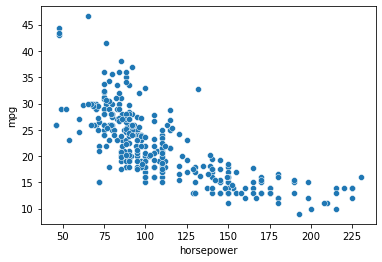

In [144]:
# pandasの場合
y = df_pd['mpg']
sns.scatterplot(x=df_pd['horsepower'], y=y)

polarsでもpandasと同様に狙った部分が消せている。  
学習データの不要な部分を削除するときなどに使える。  
polarsは少し直感的でない部分もあるが、慣れれば問題なさそう。